In [30]:
%reset -f

100%|█████████████████████████████████████████████████████████████████████| 1800/1800 [20:10<00:00,  1.49it/s]


In [31]:
%connect_info

{
  "shell_port": 50863,
  "iopub_port": 33267,
  "stdin_port": 35729,
  "control_port": 60513,
  "hb_port": 45311,
  "ip": "127.0.0.1",
  "key": "4fffaaf5-dc7488c80d01394be5126559",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-b318c94d-e574-42b3-80a2-be24cf34ad14.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [32]:
### check the status of the port
# sudo ls -la /dev/ 
### must be 666=rw all
# !groups trix_arch
### must be group tty

In [33]:
### Use in terminal
# sudo chmod 666 /dev/ttyACM0
### or RUN here
# !xfce4-terminal -e "sudo chmod 666 /dev/ttyACM0 "

In [34]:
##### Try this if previos cell does not work
###-----------------------
### Use in terminal
# sudo usermod -a -G tty $USER
### or RUN here
# !xfce4-terminal -e "sudo usermod -a -G tty $USER"

In [35]:
#######################################################
#######################################################

# Reading is done from arduino Uno via post ttyACMO
# The reading frequecny is 5Hz (200ms)
# the 1st 7/10 samples should be thruwn away 
# bcoz of bad data format

# for each reading change:
#     dir_2_save = "run0/"
#     label = "sampleX"
#     add_label = "1"
#     env_condition = "room"
#     N_of_readings = 10 #=2sec

#######################################################
#######################################################

In [36]:
import serial
from datetime import datetime
import time
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
dir_2_save = "run2_tests/"

In [38]:
# label = "samplaX"
# add_label = "1"
# env_condition = "room"
# N_of_readings = 50 #5Hz=200ms : 10 -> 2sec

### ALSO delay time.sleep() is added
label = "sample"
add_label = "1"
env_condition = "room_D"
N_of_readings = 60*10 #30min 1Hz

In [39]:
path_base = "/home/trix_arch/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
pathW = path_base + dir_2_save
os.chdir(pathW)
os.getcwd()

'/home/igor_trix/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/run2_tests'

In [40]:
serial_port = '/dev/ttyACM0'
baud_rate = 9600


pbar = tqdm(total=N_of_readings)
GGS_list = []
init_time = round(time.time(),3)*1000


    
with serial.Serial(serial_port, baud_rate) as ser:
    for cc1 in tqdm(range(10)):
        line_z = ser.readline();
        line_dec_z = line_z.decode("utf-8")
        
    while len(GGS_list) < N_of_readings:
        time.sleep(1)
        line = ser.readline();
        line_dec = line.decode("utf-8") #ser.readline returns a binary, convert to string
        lst0 = line_dec.split(",")
        lst1 = [int(x) for x in lst0]
        if len(lst1)==6:
            GGS_list += [[int(round(time.time(),3)*1000-init_time)] + lst1]
            pbar.update(1)
#             print(line_dec);

 45%|████████████████████████████████▏                                      | 272/600 [04:35<05:29,  1.00s/it]

ValueError: invalid literal for int() with base 10: ''

In [42]:
line_dec

'42,22,68,,21,66,96,28,27\r\n'

In [41]:
GGS_list

[[3488, 42, 22, 69, 94, 28, 27],
 [4492, 42, 22, 69, 95, 28, 27],
 [5496, 42, 21, 69, 95, 28, 27],
 [6499, 42, 22, 69, 94, 28, 27],
 [7503, 41, 22, 69, 94, 28, 27],
 [8507, 42, 22, 69, 95, 28, 27],
 [9511, 42, 22, 68, 95, 28, 27],
 [10515, 41, 22, 68, 95, 28, 27],
 [11518, 42, 22, 69, 95, 28, 27],
 [12523, 42, 21, 69, 95, 28, 27],
 [13527, 41, 22, 68, 95, 28, 27],
 [14531, 42, 21, 68, 95, 28, 27],
 [15534, 42, 22, 69, 95, 28, 27],
 [16536, 42, 22, 69, 94, 28, 27],
 [17539, 42, 22, 68, 94, 28, 27],
 [18541, 42, 21, 69, 95, 28, 27],
 [19549, 42, 21, 69, 95, 28, 27],
 [20553, 42, 21, 69, 95, 28, 27],
 [21557, 41, 22, 68, 95, 28, 27],
 [22559, 42, 21, 69, 94, 28, 27],
 [23564, 42, 22, 69, 95, 28, 27],
 [24568, 41, 22, 69, 95, 28, 27],
 [25571, 42, 22, 69, 95, 28, 27],
 [26575, 42, 22, 69, 95, 28, 27],
 [27579, 42, 22, 69, 95, 28, 27],
 [28582, 42, 21, 68, 95, 28, 27],
 [29586, 42, 22, 69, 95, 28, 27],
 [30590, 42, 22, 69, 95, 28, 27],
 [31593, 41, 22, 69, 95, 28, 27],
 [32597, 42, 22, 69, 

In [ ]:
GGS_list[1087][1] = 434
GGS_list[1087]

In [43]:
GGS_df = pd.DataFrame(GGS_list, columns=["time_ms", "B102NO2", "B302C2H5OH", "B502VOC", "B702CO", "TdegC", "RH"])


In [ ]:
# filename_to_save = "./%s_%s_%s_%s.csv" % (label, add_label, env_condition, datetime.now().strftime("%Y%m%d_%H%M%S"))

# with open(filename_to_save, 'w') as output_file:
#     GGS_df.to_csv(output_file, index=False)
#     print("Saved to file: " + filename_to_save)
#     print("Under the path: " + pathW)

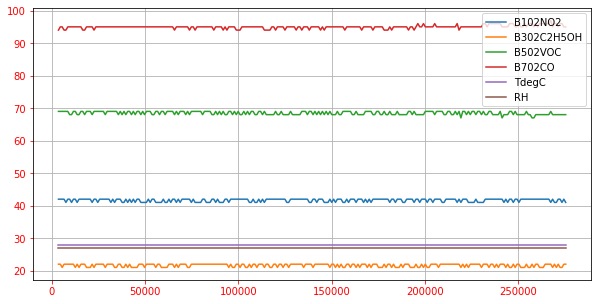

In [44]:
plt.figure(figsize=(10,5))
plt.plot(GGS_df.time_ms, GGS_df.drop('time_ms', axis=1))
plt.legend(GGS_df.drop('time_ms', axis=1).columns.to_list())
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid()

In [ ]:
GGS_df